# Creating NBA Shot Charts with Python

## Dependencies

In [30]:
from nba_api.stats.endpoints import shotchartdetail, playercareerstats
from nba_api.stats.static import players, teams
from modules.datasets import NbaScraper
from modules.charts.charts import ShotCharts
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [31]:
# get player id
name = "James Harden"
id = NbaScraper.get_json_from_name(name)['id']
print(id)
career = NbaScraper.get_player_career(id)
teams = ['PHI']
team_ids = list(set(career[career.TEAM_ABBREVIATION.isin(teams)].TEAM_ID.values))

seasons = ['2022-23']
shot_data = NbaScraper.get_shot_data(id, team_ids, seasons)
shot_data.tail()

201935


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
9,Shot Chart Detail,0022200001,400,201935,James Harden,1610612755,Philadelphia 76ers,3,7,16,...,Center(C),8-16 ft.,14,-42,137,1,1,20221018,BOS,PHI
10,Shot Chart Detail,0022200001,409,201935,James Harden,1610612755,Philadelphia 76ers,3,6,21,...,Center(C),16-24 ft.,20,-43,196,1,1,20221018,BOS,PHI
11,Shot Chart Detail,0022200001,457,201935,James Harden,1610612755,Philadelphia 76ers,3,2,41,...,Center(C),Less Than 8 ft.,3,33,8,1,1,20221018,BOS,PHI
12,Shot Chart Detail,0022200001,460,201935,James Harden,1610612755,Philadelphia 76ers,3,2,1,...,Center(C),24+ ft.,27,12,270,1,0,20221018,BOS,PHI
13,Shot Chart Detail,0022200001,618,201935,James Harden,1610612755,Philadelphia 76ers,4,3,1,...,Left Side Center(LC),24+ ft.,26,-157,212,1,1,20221018,BOS,PHI


In [32]:
shot_data.sort_values(by=['SHOT_DISTANCE'])

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
11,Shot Chart Detail,0022200001,457,201935,James Harden,1610612755,Philadelphia 76ers,3,2,41,...,Center(C),Less Than 8 ft.,3,33,8,1,1,20221018,BOS,PHI
3,Shot Chart Detail,0022200001,152,201935,James Harden,1610612755,Philadelphia 76ers,1,2,21,...,Center(C),Less Than 8 ft.,7,40,63,1,1,20221018,BOS,PHI
5,Shot Chart Detail,0022200001,298,201935,James Harden,1610612755,Philadelphia 76ers,2,3,19,...,Center(C),8-16 ft.,13,45,122,1,0,20221018,BOS,PHI
9,Shot Chart Detail,0022200001,400,201935,James Harden,1610612755,Philadelphia 76ers,3,7,16,...,Center(C),8-16 ft.,14,-42,137,1,1,20221018,BOS,PHI
10,Shot Chart Detail,0022200001,409,201935,James Harden,1610612755,Philadelphia 76ers,3,6,21,...,Center(C),16-24 ft.,20,-43,196,1,1,20221018,BOS,PHI
2,Shot Chart Detail,0022200001,140,201935,James Harden,1610612755,Philadelphia 76ers,1,2,51,...,Center(C),24+ ft.,26,78,251,1,1,20221018,BOS,PHI
13,Shot Chart Detail,0022200001,618,201935,James Harden,1610612755,Philadelphia 76ers,4,3,1,...,Left Side Center(LC),24+ ft.,26,-157,212,1,1,20221018,BOS,PHI
4,Shot Chart Detail,0022200001,269,201935,James Harden,1610612755,Philadelphia 76ers,2,6,21,...,Center(C),24+ ft.,27,-51,267,1,1,20221018,BOS,PHI
12,Shot Chart Detail,0022200001,460,201935,James Harden,1610612755,Philadelphia 76ers,3,2,1,...,Center(C),24+ ft.,27,12,270,1,0,20221018,BOS,PHI
0,Shot Chart Detail,0022200001,49,201935,James Harden,1610612755,Philadelphia 76ers,1,8,52,...,Right Side Center(RC),24+ ft.,28,89,269,1,0,20221018,BOS,PHI


## Shot Charts

In [33]:
chart1 = ShotCharts.volume_chart(shot_data, name, seasons)
chart2 = ShotCharts.volume_chart(shot_data, name, seasons, RA=False)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

ValueError: Image size of 129714x165641 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 360x360 with 1 Axes>

FileNotFoundError: [Errno 2] No such file or directory: '../data/importado/headshots/201935.png'

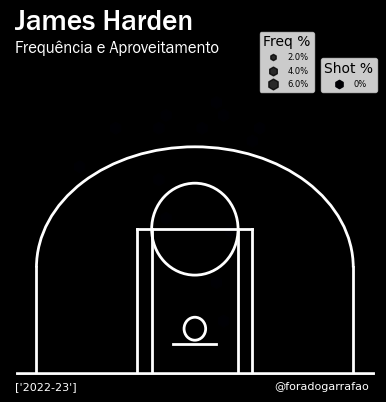

In [34]:
chart3 = ShotCharts.frequency_chart(shot_data, name, seasons)
chart4 = ShotCharts.makes_misses_chart(shot_data, name, seasons)
plt.show()

In [ ]:
NbaScraper.get_player_headshot(2544)